In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day_lst = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [3]:
def create_outcome_df(this_df, outcome_lst:[list] = ["slightly_injured", "seriously_injured", "killed"]):
    """PROJECT SPECIFIC, takes a this_df and returns a new df splitting numbers by severity of outcome
       ["slightly_injured", "seriously_injured", "killed"] with total number and percentage in relation to this_df"""
    outcome_df = pd.DataFrame(columns=["outcome", "total_number", "percentage"])
    out_lst = []
    tot_num = []
    percent = []
    for s in outcome_lst:
        out_lst.append(s)
        tot_num.append(len(this_df[this_df.accident_outcome == s]))
        percent.append(round(len(this_df[this_df.accident_outcome == s])*100/len(this_df) ,2))
    outcome_df["outcome"] = out_lst
    outcome_df["total_number"] = tot_num
    outcome_df["percentage"] = percent
    return outcome_df

In [4]:
data_ = pd.read_csv("./data/cleaned_data.csv", encoding="UTF-8")

In [5]:
data_.head()

,ujahr,umonat,weekday,uwochentag,long,lat,time_of_day,ustunde,light_condition,ulichtverh,...,uart,utyp1,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,ukategorie,accident_outcome
0,2018,1,Wed,4,52.513597,13.475018,afternoon,15,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
1,2018,1,Mon,2,52.587259,13.291022,morning,11,daylight,0,...,2,6,0,1,0,0,0,0,3,slightly_injured
2,2018,1,Tue,3,52.526019,13.420578,morning,9,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
3,2018,1,Mon,2,52.481844,13.348288,afternoon,17,dark,2,...,6,7,0,1,1,0,0,0,3,slightly_injured
4,2018,1,Wed,4,52.583472,13.403228,afternoon,15,dusk,1,...,6,7,1,0,1,0,0,0,3,slightly_injured


## Sorted by different criteria

### Weekday, complete DataFrame

In [6]:
for d in day_lst:
    print("*** -",d.capitalize(),round(len(data_[data_.weekday == d])*100/len(data_),2),"% of all accidents ***")
    print(create_outcome_df(data_[data_.weekday == d]),"\n----------------------------------------------")

*** - Mon 16.11 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          5333       85.21
1  seriously_injured           906       14.48
2             killed            20        0.32 
----------------------------------------------
*** - Tue 16.78 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          5584       85.64
1  seriously_injured           916       14.05
2             killed            20        0.31 
----------------------------------------------
*** - Wed 16.86 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          5579       85.18
1  seriously_injured           945       14.43
2             killed            26        0.40 
----------------------------------------------
*** - Thu 16.59 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          5421       84.11
1  seriously_injured          1012       1

### Weekday, by year

In [7]:
yr_total = []
yr_prcnt = []
wd_prcnt = [[], [], []]
c = 0
for y in [2018, 2019, 2020]:
    print("**********************************************")
    print("********************",y,"********************")
    print("**********************************************")
    data_yr = data_[data_.ujahr == y]
    yr_total.append(len(data_yr))
    yr_prcnt.append(round(len(data_yr)*100/len(data_), 2))
    print(f"\nTotal accidents: {len(data_yr)} ({round(len(data_yr)*100/len(data_), 2)} %)\n")
    for d in day_lst:
        print("*** -",d.capitalize(),round(len(data_yr[data_yr.weekday == d])*100/len(data_yr),2),"% of all accidents ***")
        wd_prcnt[c].append(round(len(data_yr[data_yr.weekday == d])*100/len(data_yr),2))
        print(create_outcome_df(data_yr[data_yr.weekday == d]),"\n----------------------------------------------")
    c += 1    

**********************************************
******************** 2018 ********************
**********************************************

Total accidents: 13652 (35.14 %)

*** - Mon 16.28 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          1863       83.84
1  seriously_injured           350       15.75
2             killed             9        0.41 
----------------------------------------------
*** - Tue 16.88 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          1964       85.24
1  seriously_injured           334       14.50
2             killed             6        0.26 
----------------------------------------------
*** - Wed 16.82 % of all accidents ***
             outcome  total_number  percentage
0   slightly_injured          1922       83.71
1  seriously_injured           365       15.90
2             killed             9        0.39 
----------------------------------------------

In [8]:
weekday_by_year_df = pd.DataFrame(columns=["weekday", "2018", "2019", "2020"])
weekday_by_year_df["weekday"] = day_lst
weekday_by_year_df["2018"] = wd_prcnt[0]
weekday_by_year_df["2019"] = wd_prcnt[1]
weekday_by_year_df["2020"] = wd_prcnt[2]

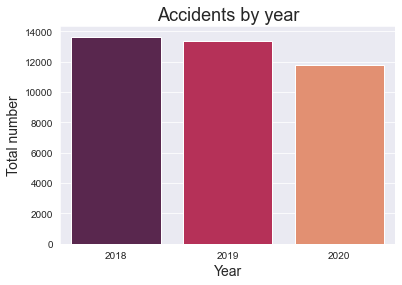

In [9]:
sns.set_style('darkgrid')
sns.barplot(x=[2018, 2019, 2020], y=yr_total, palette="rocket")
plt.title("Accidents by year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total number", fontsize=14)
plt.show()

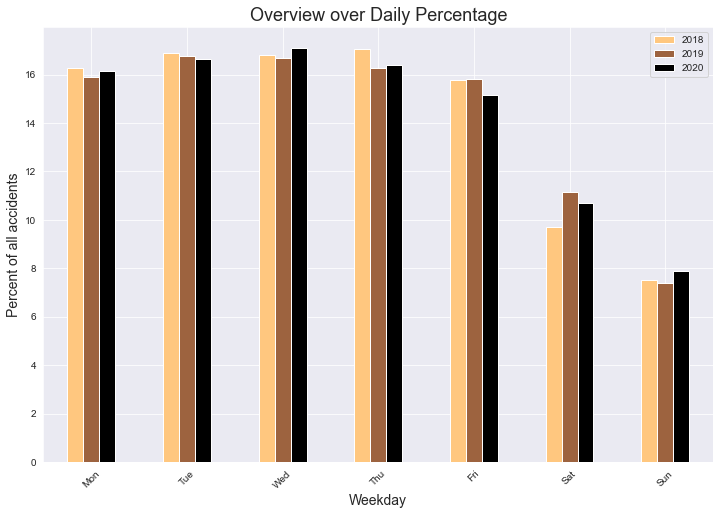

In [10]:
sns.set_style('darkgrid')
weekday_by_year_df.plot(x="weekday", y=["2018", "2019", "2020"], kind="bar", figsize=(12,8), colormap="copper_r")
plt.title("Overview over Daily Percentage", fontsize=18)
plt.xlabel("Weekday", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Percent of all accidents", fontsize=14)

plt.show()

In [8]:
len(data_[data_.ujahr == 2020])

11810